# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

#Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

#Instalar dependendias

In [ ]:
!pip install sklearn

# SVR

# Cómo importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [ ]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

# Escalado de variables

In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

X, y

(array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]),
 array([[-0.72004253],
        [-0.70243757],
        [-0.66722767],
        [-0.59680786],
        [-0.49117815],
        [-0.35033854],
        [-0.17428902],
        [ 0.17781001],
        [ 0.88200808],
        [ 2.64250325]]))

# Ajustar la regresión con el dataset

In [4]:
from sklearn.svm import SVR

In [6]:
regression = SVR(kernel = "rbf")
regression.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

# Predicción de nuestros modelos con SVR


In [7]:
y_pred = sc_y.inverse_transform(regression.predict(sc_X.transform(np.array([[6.5]]))))

# Visualización de los resultados del SVR

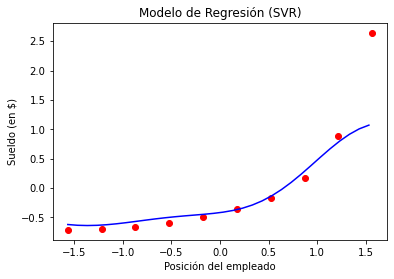

In [8]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()